In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
from shapely.geometry import Polygon
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
## Make more detailed Country
africa = gpd.read_file("downloaded/Africa_SHP/Africa.shp")
#world_1 = gpd.read_file("shapefiles/World_SHP/world_1.shp")
africa.crs = {'init': 'epsg:4326'}

# Crop world by Africa
#africa_1 = gpd.overlay(world_1, africa, how="intersection")
#africa_1.plot()
#africa_1.to_file("shapefiles/Africa_SHP/africa_1.shp")

AssertionError: Number of manager items must equal union of block items
# manager items: 39, # tot_items: 49

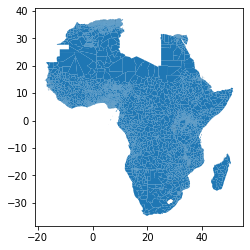

In [5]:
# Union to add in the two missing countries (Libya and Western Sahara) if you use level 2
world_2 = gpd.read_file("shapefiles/World_SHP/world_2.shp")

# Crop world by Africa
africa_2 = gpd.overlay(world_2, africa, how="intersection")
africa_2.plot()
africa_2.to_file("shapefiles/Africa_SHP/africa_2.shp")

wsahara = gpd.read_file("shapefiles/Western Sahara_SHP/WS_1.shp")
libya = gpd.read_file("shapefiles/Libya_SHP/Libya_1.shp")
wsahara.crs = {'init': 'epsg:4326'}
libya.crs = {'init': 'epsg:4326'}
missing = gpd.overlay(wsahara, libya, how='union')
africa_all = gpd.overlay(africa_2, missing, how='union')
africa_all.to_file("shapefiles/Africa_SHP/africa_2.shp")

In [2]:
africa.plot()


NameError: name 'africa' is not defined

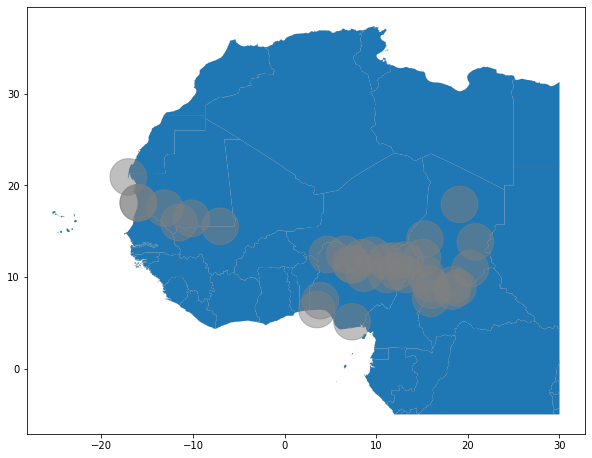

In [4]:
## Vis1: Markets-Buffer

# read in shapefiles
africa_1 = gpd.read_file("shapefiles/Africa_SHP/Africa.shp")
africa_1.crs = {'init': 'epsg:3857', 'no_defs': True}
markets_buffer = gpd.read_file("shapefiles/Markets_SHP/markets_buffer.shp")
markets_buffer.at[11, 'market'] = "Nouakchott, Marche SCIM"
markets_buffer.crs = {'init': 'epsg:3857'}
countries = ["Chad", "Mauritania", "Nigeria"]
m_b = markets_buffer.loc[markets_buffer.country.isin(countries)]

# crop the image because we don't care about the lower half rn
bbox = gpd.GeoSeries([Polygon([(-30,-5), (30, -5), (30, 40), (-30, 40)])])
box = gpd.GeoDataFrame({'geometry': bbox})
box.crs = {'init': 'epsg:3857', 'no_defs': True}

intersec = gpd.overlay(africa_1, box, how="intersection")
intersec.head()

# overlay markets and plot
f, ax = plt.subplots(1, figsize = (10,10))
gpd.plotting.plot_polygon_collection(ax, intersec['geometry'], linewidth=0.1, edgecolor='grey')
gpd.plotting.plot_polygon_collection(ax, m_b['geometry'], color="grey", alpha=(".5"))

plt.gca().set_aspect('equal')
#ax.set_title("Studied Climate Region by Market", fontsize=18)
#ax.set_axis_off()
plt.savefig('markets.png')
plt.show()


In [6]:
## Vis2: Populations

# read in population data
city_pop = pd.read_csv("downloaded/city_populations.csv")


In [8]:
## Vis3: Commodity Maps
commodities = pd.read_csv("shared/filter_price.csv")
commodities.head()
com = commodities[['country', 'def_value', 'type']]
com_summary = com.groupby(['type', 'country']).describe().reset_index()
com_summary = pd.DataFrame(data=com_summary)
com_summary

type     country def_value                                     \
                            count        mean        std         min   
0     maize      Angola      35.0    7.039819   1.513068    0.852803   
1     maize        Chad     545.0  185.975261  49.548743   69.783731   
2     maize      Malawi     858.0   52.371278  13.655479   26.109351   
3     maize  Mauritania    1314.0   10.895851   2.182062    4.888944   
4     maize     Nigeria   14783.0   62.673294  25.686866   18.182416   
5    millet        Chad    1188.0  197.990895  47.063391   88.015740   
6    millet  Mauritania     634.0   11.140254   4.475261    4.699543   
7    millet     Nigeria    6860.0   68.660866  27.916250   16.732184   
8   sorghum        Chad    1243.0  140.923558  37.890856   62.491176   
9   sorghum    Djibouti     120.0  166.883287  24.802521  145.640978   
10  sorghum  Mauritania    2838.0   12.873630   5.946535    3.126002   
11  sorghum     Nigeria   14733.0   66.766160  30.387148    5.889729   

                                                    
           25%         50%         75%         max  
0     6.209046    7.542678    8.015329    9.166971  
1   151.525188  188.672004  218.725338  344.699675  
2    40.168232   52.218702   60.252348  100.803522  
3     9.993905   10.447304   12.532754   20.052407  
4    43.910951   57.315950   79.023899  579.955958  
5   166.545514  195.679665  229.049702  383.479682  
6     6.690603   11.083167   14.050957   26.118260  
7    46.354842   63.728875   86.825282  180.707586  
8   112.997528  138.052686  162.897801  280.000000  
9   146.294680  146.294680  193.744784  200.000000  
10    7.835478   11.332938   16.735471  106.504768  
11   43.989716   59.988377   84.433463  273.069241

In [9]:
## all markets is markets_buffer just the ones I've done math for is m_b
coms = commodities[['market', 'type']].drop_duplicates()
markets = pd.merge(markets_buffer, coms, on='market', how="inner")

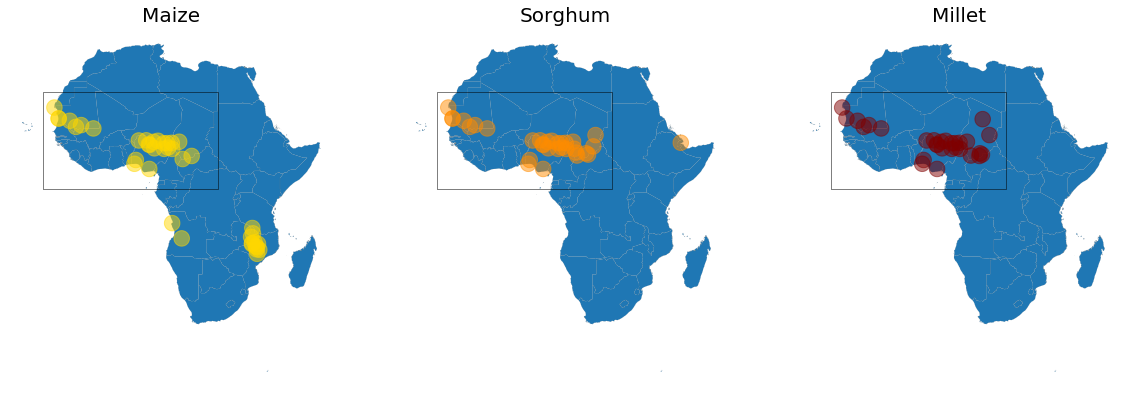

In [10]:
#create tables to plot for all three types
mz = markets.loc[markets['type'] == "maize"]
ms = markets.loc[markets['type'] == "sorghum"]
mm = markets.loc[markets['type'] == "millet"]

# get just relevant countries for each type
mz_c = mz.loc[mz.country.isin(countries)]
mm_c = mm.loc[mm.country.isin(countries)]
ms_c = ms.loc[ms.country.isin(countries)]

bbox = gpd.GeoSeries([Polygon([(-20,0), (25, 0), (25, 25), (-20, 25)])])
# overlay markets and plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
gpd.plotting.plot_polygon_collection(ax1, africa_1['geometry'], linewidth=0.1, edgecolor='grey')
gpd.plotting.plot_polygon_collection(ax1, mz['geometry'], color="gold", alpha=(".5"))
gpd.plotting.plot_polygon_collection(ax1, bbox, facecolor="none", edgecolor="black", alpha=(".5"))
ax1.set_aspect('equal')
ax1.set_axis_off()
ax1.set_title("Maize", fontsize=20)

gpd.plotting.plot_polygon_collection(ax2, africa_1['geometry'], linewidth=0.1, edgecolor='grey')
gpd.plotting.plot_polygon_collection(ax2, ms['geometry'], color="darkorange", alpha=(".5"))
gpd.plotting.plot_polygon_collection(ax2, bbox, facecolor="none", edgecolor="black", alpha=(".5"))
ax2.set_aspect('equal')
ax2.set_axis_off()
ax2.set_title("Sorghum", fontsize=20)

gpd.plotting.plot_polygon_collection(ax3, africa_1['geometry'], linewidth=0.1, edgecolor='grey')
gpd.plotting.plot_polygon_collection(ax3, mm['geometry'], color="maroon", alpha=(".5"))
gpd.plotting.plot_polygon_collection(ax3, bbox, facecolor="none", edgecolor="black", alpha=(".5"))
ax3.set_aspect('equal')
ax3.set_axis_off()
ax3.set_title("Millet", fontsize=20)


plt.show()

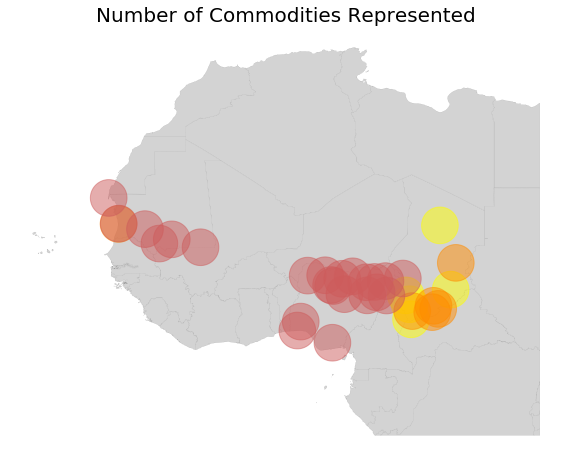

In [16]:
three_comms = commodities[commodities.type.isin(['maize', 'sorghum', 'millet'])]
three_comms = three_comms[three_comms.country.isin(countries)]
three_comms = three_comms[['market', 'country', 'type', 'latitude', 'longitude']].drop_duplicates().groupby(['market', 'country']).count()
three_comms = pd.merge(markets_buffer, three_comms, on='market', how="inner")

tco = three_comms.loc[three_comms['type'] == 1]
tct = three_comms.loc[three_comms['type'] == 2]
tce = three_comms.loc[three_comms['type'] == 3]
f, ax = plt.subplots(1, figsize = (10,10))

#plot both africa and markets
gpd.plotting.plot_polygon_collection(ax, intersec['geometry'], linewidth=0.1, edgecolor='grey', facecolor='lightgrey')
gpd.plotting.plot_polygon_collection(ax, tco['geometry'], color = 'yellow', alpha=(".5"))
gpd.plotting.plot_polygon_collection(ax, tct['geometry'], color = 'darkorange', alpha=(".5"))
gpd.plotting.plot_polygon_collection(ax, tce['geometry'], color = 'indianred', alpha=(".5"))

ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title("Number of Commodities Represented", fontsize=20)
plt.show()

In [264]:

mm.country.unique()

array(['Chad', 'Nigeria', 'Mauritania'], dtype=object)